<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/Anova_and_chi_square_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

# **ANOVA**

## **Load Libraries**

In [2]:
from sklearn import datasets

# Built in data set
iris =datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.shape

(150, 4)

In [11]:
df['target']=iris.target # adding column 'target'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [13]:
df[df['target']==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
df[df['target']==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [15]:
df[df['target']==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [16]:
df[df['target']==0]['sepal width (cm)']

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    4.4
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    4.1
33    4.2
34    3.1
35    3.2
36    3.5
37    3.6
38    3.0
39    3.4
40    3.5
41    2.3
42    3.2
43    3.5
44    3.8
45    3.0
46    3.8
47    3.2
48    3.7
49    3.3
Name: sepal width (cm), dtype: float64

In [17]:
df[df['target']==1]['sepal width (cm)']

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), dtype: float64

In [18]:
df[df['target']==2]['sepal width (cm)']

100    3.3
101    2.7
102    3.0
103    2.9
104    3.0
105    3.0
106    2.5
107    2.9
108    2.5
109    3.6
110    3.2
111    2.7
112    3.0
113    2.5
114    2.8
115    3.2
116    3.0
117    3.8
118    2.6
119    2.2
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), dtype: float64

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
group1_setosa = df[df['target']==0]['sepal width (cm)']
group2_versicolor = df[df['target']==1]['sepal width (cm)']
group3_virginica = df[df['target']==2]['sepal width (cm)']


In [24]:
group1_setosa.mean(),group2_versicolor.mean(),group3_virginica.mean()

(3.428, 2.7700000000000005, 2.974)

<Axes: >

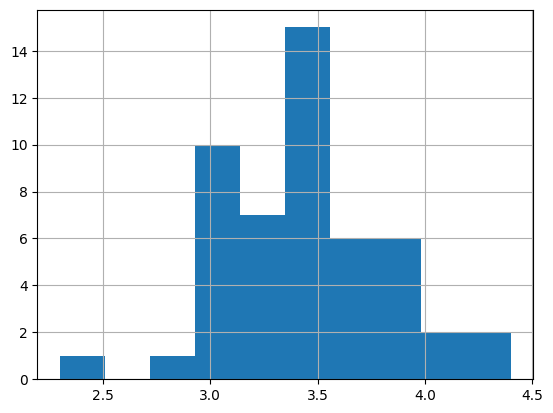

In [25]:
group1_setosa.hist()

<Axes: >

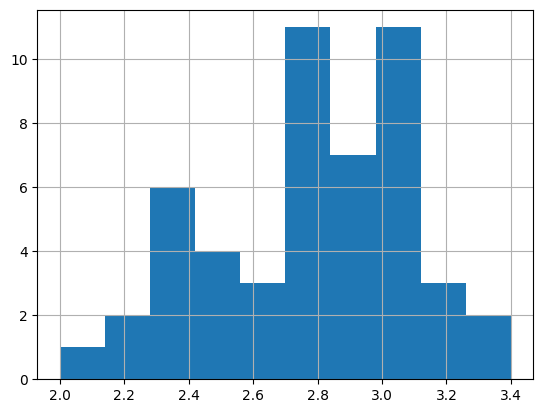

In [26]:
group2_versicolor.hist()

<Axes: >

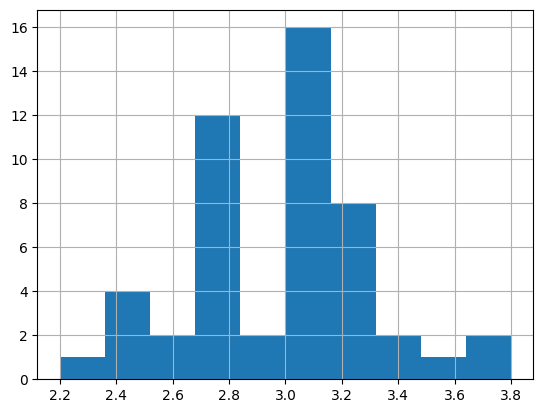

In [27]:
group3_virginica.hist()

In [28]:
import seaborn as sns

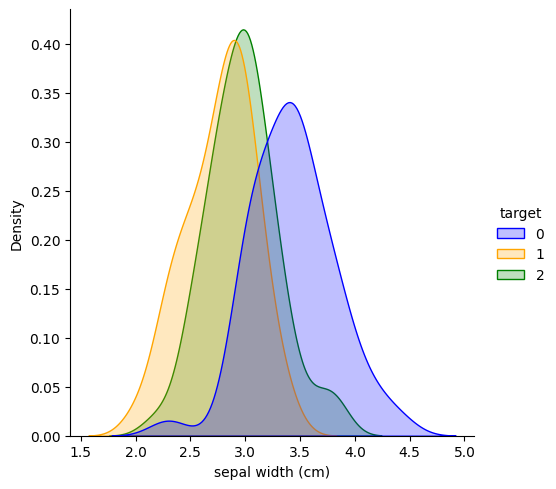

In [29]:
sns.displot(data=df,
            x='sepal width (cm)',
            hue='target',
            fill=True,
            kind='kde',
            palette=['Blue','Orange','Green']
            )

In [30]:
stats.f_oneway(group1_setosa,group2_versicolor,group3_virginica)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

# **Chi-square Test**

In [32]:
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import pandas as pd

In [33]:
data=[[14,4],
      [0,10]]

data

[[14, 4], [0, 10]]

In [35]:
df=pd.DataFrame(data,
                index=['Athlete','Non-Athlete'],
                columns=['Non-smoker','smoker']
                )
df

,Non-smoker,smoker
Athlete,14,4
Non-Athlete,0,10


<Axes: >

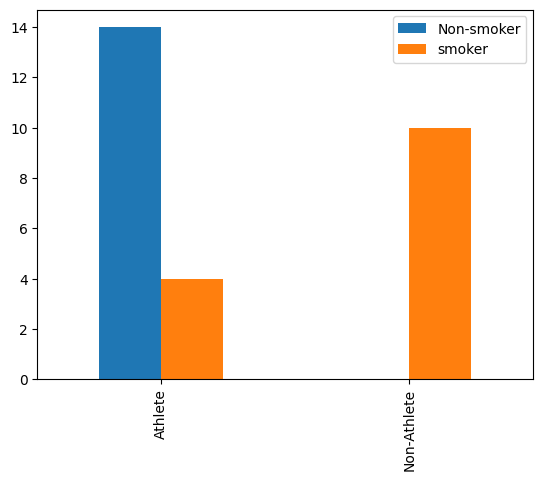

In [41]:
df.plot(kind='bar',stacked=False)

In [42]:
chi2_contingency(data)

Chi2ContingencyResult(statistic=12.600000000000001, pvalue=0.0003857467556820071, dof=1, expected_freq=array([[9., 9.],
       [5., 5.]]))